### Student name: Jhuma Mim, Bipul Biswas


In [1]:
!pip install tensorflow
!pip install sklearn
!pip install numpy
!pip install matplotlib

In [5]:
!python -V

Python 3.9.12


### Our neural network classifier did not perform as expected and showed only 49% accuracy compared to LR 88% accuracy. Unfortunately we could not complete the building of the NN network due to the time constraint. However, our LR model performance is good; so we decided LR classifier model is our final model

##  Import libraries, loading and preprocessing the training and testing data


In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib, time, copy, os, requests, zipfile, sys
from sklearn.preprocessing import OneHotEncoder
from scipy.special import softmax
onehot_encoder = OneHotEncoder(sparse=False)
# Matplotlib to plot the image
import matplotlib.pyplot as plt
# Off-the-shelf evaluation functions provided by sklearn
from sklearn.metrics import confusion_matrix, accuracy_score
# Matplotlib predefined 'magic function'. It will include graphs in notebook

In [2]:
# data reading
instruction=[]
label=[]

for i in range(10):
    for x in range(88):
        if x < 9:
            data=pd.read_csv('training_data/stroke_'+str(i)+'_000'+str(x+1)+'.csv',header=None )  
        else:
            data=pd.read_csv('training_data/stroke_'+str(i)+'_00'+str(x+1)+'.csv' ,header=None)         
        m=[]
        for j in range(len(data)):   
            m.append(data[0][j])
            m.append(data[1][j])
            m.append(data[2][j])
        z = [0] * 879
        n=m+z
        instruction.append(n[:879])
        label.append(i)

In [3]:
# data converting into pandas data frame, also scaling
from scipy.stats import zscore

# dictionary of lists 
dict = {'instruction': instruction, 'label': label}     
df = pd.DataFrame(dict)
f=df['instruction'].apply(zscore)
f


0      [-0.3422815609016893, 5.712518305361934, -0.52...
1      [-0.06304732003559739, 5.725598386343272, -0.8...
2      [-0.49024445869483824, 2.4789086066153017, -0....
3      [0.063404097704049, 3.67192560326944, -0.98897...
4      [-0.67234883862802, 4.233174636876389, -0.4207...
                             ...                        
875    [-0.21233461819337524, 5.112613818324479, -0.7...
876    [-0.07281702422439772, 6.681158008964243, -0.4...
877    [0.11748015711135194, 5.114054368825128, -0.62...
878    [0.1552610315671241, 4.82988307351016, -0.4094...
879    [-0.5837166148646206, 3.1693517315554804, -0.4...
Name: instruction, Length: 880, dtype: object

In [4]:
df

,instruction,label
0,"[-8.9283, 304.45, -18.469, -9.1475, 304.36, -1...",0
1,"[5.216, 284.05, -31.627, 4.4335, 284.87, -31.4...",0
2,"[-18.936, 532.37, -50.688, -18.736, 532.44, -5...",0
3,"[34.544, 501.13, -101.53, 35.731, 502.84, -100...",0
4,"[-37.598, 319.47, -19.287, -37.697, 319.39, -1...",0
...,...,...
875,"[-2.4289, 270.34, -31.89, -2.4386, 270.16, -31...",9
876,"[3.7842, 341.6, -15.488, -1.6251, 348.81, -15....",9
877,"[16.433, 282.77, -23.029, 15.942, 283.35, -22....",9
878,"[23.074, 315.42, -12.243, 23.117, 315.42, -12....",9


In [8]:
#divided data into train and validation
X_train, X_test, y_train, y_test = train_test_split(f, df['label'], test_size=0.001, random_state=42)

p=[]
for i in X_train:
    p.append(list(i))
X_train=np.array(p)
X_train.shape

c=[]
for i in X_test:
    c.append(list(i))
X_test=np.array(c)
X_test.shape
X_test= X_train 
y_test= y_train

### Built a NN digit (0...9) detection classifier from scratch

In [9]:
# Load the training input
X_train = X_train
# Load the training labels
X_test = X_test
# Load the testing input
Y_train = y_train
# Load the testing labels
Y_test = y_test

# Get the number of classes
num_classes = 10
# Get the number of training samples and their resolution for reshape
num_trains= X_train.shape

def one_hot_vector(x, num_classes):
    # By now, I think you already heard about this so many times
    return np.eye(num_classes)[x].T

Y_train, Y_test = one_hot_vector(Y_train, num_classes), one_hot_vector(Y_test, num_classes)
len(Y_train[0])

879

##  Loss function and optimization
*Definition:* loss function is a function that maps an event or values of one or more variables onto a real number intuitively representing some "cost" associated with the event. Loss function (sometime called cost function) is used to calculate the gradient by applying the chain rule, so that we can update the weights (and bias) of our neural network using optimizer such as gradient descent. <br>
It could be interpreted as using loss function to calculate the network’s layers error, in which we calculate the error of the current layer, then pass the weighted error back to the previous layer, and recursively doing this until we travel back to the first hidden layer. At each layer, we update the weights using the derivative of the cost for each weight.


### Construct A NN model digit classification
Our neural network contains two hidden layer and an output layer. 

In [10]:
# Numbers of input units
num_input = X_train.shape[0]
print(num_input)
# Number of neural in my  hidden layer

num_hidden = 400
## here I made both equal number of hidden layer for hidden 1 and 2 leayes

# Construct neural network 
# Random initialize the hidden layer weights (w/o bias)

W1 = np.random.randn(num_hidden, num_input) * 0.01


# Random initialize the output layer weights (w/o bias)
W2 = np.random.randn(num_classes, num_hidden) * 0.01

def sigmoid(X):

    return 1/(1 + np.exp(-X)) 

def softmaxx(X):
    return np.exp(X) / np.sum(np.exp(X), axis=0)

def cross_entropy_loss(Y, Y_pred):
    return -np.sum(np.multiply(Y, np.log(Y_pred)))

879


## Part Gradient check using finite-difference approximation. 
When training deep neural network, there are many things that can go wrong. the gradient is very important. Hence, we  must making sure that the calculation of our  gradient is correct. A correct gradient calculation won't promise  model will converge, but if the calculation was wrong our  model will perform very weird. This type of error is hard to debug, so we  better prevent it beforehand. <br> 


### Hyper-parameters in  training

In [11]:
# Flag use to enable/disable weight decay regularization
is_weight_decay = True

if is_weight_decay:
    # Setting lambda coefficient for weight decay
    lmda = np.exp(-7)

# Seting learning rate and momentum for SGD
learning_rate = 0.25
beta = 0.5

# Seting the number of training epochs
epoch = 400
# Choose  batch size
batch_size = 128
# Calculation of  the number of training iterations base on the number of training samples and  batch size
num_batchs = num_trains[0] // batch_size

print("Num_trains: {}, num_batchs: {}".format(num_trains[0], num_batchs))


Num_trains: 879, num_batchs: 6


In [836]:
X_train.shape[0]

879

### Training Our  network

<IPython.core.display.Javascript object>


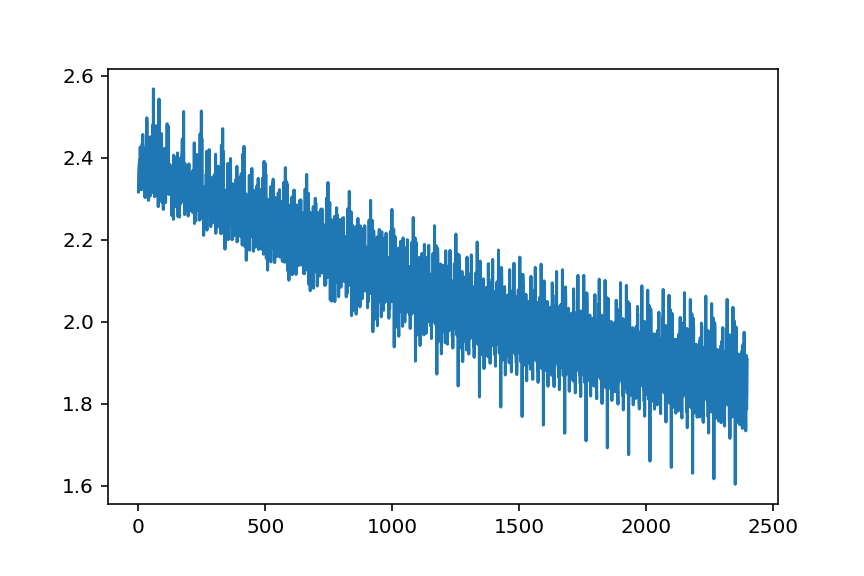

In [12]:
# Define an interactive ipython figure to display the training loss
%matplotlib notebook
fig = plt.figure("Training loss")
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()

# Log the training loss
loss_log = []

# Zeros initialize the momentum for SGD

V_dW1 = np.zeros(W1.shape)
V_dW2 = np.zeros(W2.shape)

# Training
for i in range(epoch):
    start_t = time.time()
    
    # Random shuffle training data every training epoch
    np.random.seed(np.random.randint(num_trains[1]))
    indices = np.random.permutation(num_trains[1])
    p=list(X_train)
    X_train_shuffled, Y_train_shuffled = X_train[:, indices], Y_train[:, indices]

    for j in range(num_batchs):

        # Get mini-batch samples for training
        start_idx = j * batch_size
        end_idx = min(j * batch_size + batch_size, X_train.shape[1] - 1)
        X, Y = X_train_shuffled[:, start_idx : end_idx], Y_train_shuffled[:, start_idx : end_idx]
        # Size of actual mini-batch, it could be smaller than batch_size
        mini_batch = end_idx - start_idx
        
        Z1 = np.dot(W1, X)
        A1 = sigmoid(Z1)
        Z2 = np.dot(W2, A1)
        A2 = softmaxx(Z2)
        
#         print(Z1.shape, A1.shape, Z2.shape, A2.shape)


        if is_weight_decay: 
            # call cross entropy loss with weight decay regularization

            L2_reg = (np.sum(np.square(W1)) + np.sum(np.square(W2)))*(lmda/(2*mini_batch))
            L = (cross_entropy_loss(Y, A2)/mini_batch) + L2_reg
        else:
            # call cross entropy loss
            L = cross_entropy_loss(Y, A2)/mini_batch
        
        # Log the training loss during training
        loss_log.append(L)
        
        # calculate the derivative of 𝐿 with respect to 𝑍2 using 
        dZ2 = A2-Y       
        
        if is_weight_decay:
            #  calculate the derivative of 𝐿 with respect to W2
     
            dW2 = np.dot(dZ2, A1.T)/mini_batch + (lmda/mini_batch)*W2
        else:
            # calculate the derivative of 𝐿 with respect to W2
            dW2 = np.dot(dZ2, A1.T)/mini_batch
        
        # calculate the derivative of 𝐿 with respect to A1
        dA1 = np.dot(W2.T, dZ2)
        
        # calculate the derivative of 𝐿 with respect to Z1 
        dZ1 = np.multiply(dA1, A1*(1-A1))
        
        if is_weight_decay:
            # calculate the derivative of 𝐿 with respect to W1 
            dW1 = np.dot(dZ1, X.T)/mini_batch + (lmda/mini_batch)*W1
        else:
            # calculate the derivative of 𝐿 with respect to W1
            dW1 = np.dot(dZ1, X.T)/mini_batch          

        # Update the learning velocity 
        V_dW1 = beta*V_dW1+(1-beta)*dW1
        V_dW2 = beta*V_dW2+(1-beta)*dW2

        # Update the model weights
        W1 = W1 - learning_rate*V_dW1
        W2 = W2 - learning_rate*V_dW2

#         if (j % 100 == 0):
#             print("[Epoch/Iterations]:[{}/{}], loss: {}".format(i, j, L))
            
    ax.clear()
    ax.plot(loss_log)
    fig.canvas.draw()
#     print("=> Elapsed time epoch #{} : {:.2f} seconds".format(i, time.time() - start_t))

### Evaluate the performance of  model  

In [13]:
# implement of  the forward-pass  
Z1 = np.dot(W1,X_train)
A1 = sigmoid(Z1)
Z2 = np.dot(W2,A1)
A2 = softmaxx(Z2)

# Evaluate the performance of  NN
predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_train, axis=0)
predictions

print("Testing accuracy: {}".format(accuracy_score(labels, predictions)))


Testing accuracy: 0.3390216154721274
